---
# Python Course - Class 2:
# Scientific Libraries and Data Manipulation
---

** - Why not use basic Python?**

Originally Python was not designed for numeric computation in mind. Even now, 30 years after its debut:  
"The language comes with a large standard library that covers areas such as string processing (regular expressions, Unicode, calculating differences between files), Internet protocols (HTTP, FTP, SMTP, XML-RPC, POP, IMAP, CGI programming), software engineering (unit testing, logging, profiling, parsing Python code), and operating system interfaces (system calls, filesystems, TCP/IP sockets). Look at the table of contents for The Python Standard Library to get an idea of what’s available. A wide variety of third-party extensions are also available. Consult the Python Package Index to find packages of interest to you."  (https://docs.python.org/)

Thus, even if has built-in ** *math* ** and  ** *stats* ** libraries, they are not efficient. In this context, several scientific libraries appeared.


---
# Numpy (https://numpy.org/doc/stable/)


In [7]:
import numpy as np
print(np.__doc__[:188])


NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation




## - Why Numpy?


"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more." (https://numpy.org/)

### &rarr; Example: Multiplying two lists/arrays


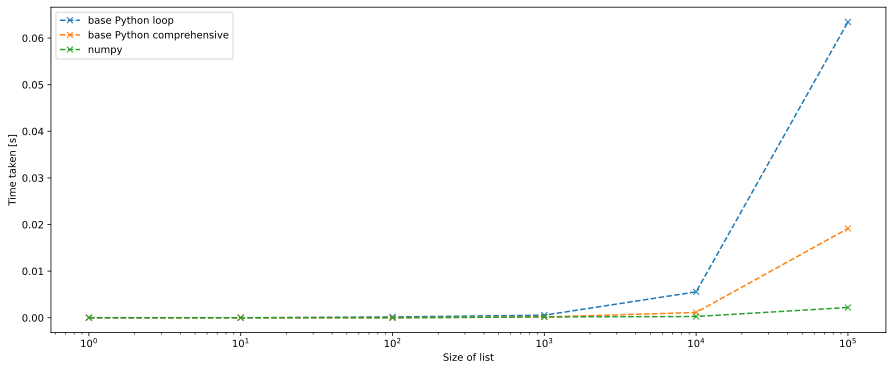

In [13]:
from time import process_time       # for timing
import matplotlib.pyplot as mplt    # for plotting

time_py_loop, time_py_comprehensive, time_numpy = [],[],[]

lengths = sorted([10**n for n in range (6)])

# print (lengths)
for lenght in lengths:
    a = range (lenght)
    b = range (lenght)

    # with base Python (looping)
    start_py = process_time()
    c = []
    for i in range(len(a)):
        c.append(a[i]*b[i])
    end_py = process_time()
    time_py_loop.append(end_py - start_py)

    # with base Python (comprehensive)
    start_py = process_time()
    c = [a_i*b_i for a_i,b_i in zip(a,b)]
    end_py = process_time()
    time_py_comprehensive.append(end_py - start_py)


    # with NumPy
    a = np.arange (lenght)
    b = np.arange (lenght)

    start_np = process_time()
    c = a * b
    end_np = process_time()
    time_numpy.append(end_np - start_np)

# plotting code
%config InlineBackend.figure_format = 'svg' # Better quality plots in jupyter notebooks
mplt.figure(figsize = (15,6))
mplt.plot(lengths, time_py_loop, label = 'base Python loop', ls='--', marker="x")
mplt.plot(lengths, time_py_comprehensive, label = 'base Python comprehensive', ls='--', marker="x")
mplt.plot(lengths, time_numpy, label = 'numpy', ls='--', marker="x")

mplt.xlabel("Size of list")
mplt.ylabel("Time taken [s]")
# mplt.ticklabel_format(style="sci", axis="x", scilimits=(0,0))
mplt.xscale("log")
mplt.legend()
mplt.show()



** NumPy is much faster than base Python!!!**

<img align="left" width="500" src="./know_more_banner.png">  <br /><br />


https://towardsdatascience.com/how-fast-numpy-really-is-e9111df44347


## - The core of NumPy - the **ndarray** object:

The * **ndarray** * is a multidimensional container of items of the same type and size. It has two main properties:
- *shape* - specifies the dimensions of the array, and can be specified in the form of a tuple or from lists of lists.
- *dtype* - defines the data type of the items in the array (for example, *np.int32*, *np.float64*, etc)

## - Some useful NumPy functions:
### &rarr; array creation


In [69]:
import numpy as np
# Create array from list of lists
A = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
print('type = {}, shape = {}\n{}\n'.format(type(A), np.shape(A),A))

type = <class 'numpy.ndarray'>, shape = (2, 3)
[[1 2 3]
 [4 5 6]]


In [73]:
# Create empty 4 x 3 array from tuple
B = np.empty((4,3), dtype = np.float64)
print('type = {}, shape = {}\n{}\n'.format(type(B), np.shape(B),B))

type = <class 'numpy.ndarray'>, shape = (4, 3)
[[1.00000e+00 1.00000e+01 1.00000e+02]
 [1.00000e+03 1.00000e+04 1.00000e+05]
 [2.90000e-06 2.30000e-06 8.00000e-06]
 [8.19000e-05 9.37200e-04 1.54223e-02]]


In [76]:
# 3 x 8 array, filled with zeroes
C = np.zeros((3,8), dtype = np.float64)
print('type = {}, shape = {}\n{}\n'.format(type(C), np.shape(C),C))

type = <class 'numpy.ndarray'>, shape = (3, 8)
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [79]:
# filled with ones, same shape as C
D = np.ones_like(C)
print('type = {}, shape = {}\n{}\n'.format(type(D), np.shape(D),D))

type = <class 'numpy.ndarray'>, shape = (3, 8)
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [7]:
# array that starts at 3, ends at 13, with each item separated by 2
E = np.arange(3,39,2)
print('type = {}, shape = {}\n{}\n'.format(type(E), np.shape(E),E))

type = <class 'numpy.ndarray'>, shape = (18,)
[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37]


In [8]:
# array with 10 evenly spaced points, calculated over the interval [-25, 13].
F = np.linspace(-25,13, num = 10)
print('type = {}, shape = {}\n{}\n'.format(type(F), np.shape(F),F))

type = <class 'numpy.ndarray'>, shape = (10,)
[-25.         -20.77777778 -16.55555556 -12.33333333  -8.11111111
  -3.88888889   0.33333333   4.55555556   8.77777778  13.        ]


### &rarr; array manipulation:




In [9]:
# reshape array E to 3 x 6
E_3x6 = E.reshape(3,6)
print('type = {}, shape = {}'.format(type(E_3x6), np.shape(E_3x6)))
print(E_3x6)


type = <class 'numpy.ndarray'>, shape = (3, 6)
[[ 3  5  7  9 11 13]
 [15 17 19 21 23 25]
 [27 29 31 33 35 37]]


In [10]:
# transpose E_3x6
print('type = {}, shape = {}\n{}\n'.format(type(E_3x6.T), np.shape(E_3x6.T),E_3x6.T))

type = <class 'numpy.ndarray'>, shape = (6, 3)
[[ 3 15 27]
 [ 5 17 29]
 [ 7 19 31]
 [ 9 21 33]
 [11 23 35]
 [13 25 37]]


In [11]:
# indexing
import random
for i in random.sample(range(np.shape(E_3x6)[0]),2):
    for j in random.sample(range(np.shape(E_3x6)[1]),2):
        print('E_3x6[{},{}]: \t{}'.format(i,j,E_3x6[i,j]))



E_3x6[0,2]: 	7
E_3x6[0,4]: 	11
E_3x6[1,1]: 	17
E_3x6[1,4]: 	23


In [92]:
# slicing : ARRAY[start:end:step, start:end:step, ...]
# columns 0 and 2 :
label = 'E_3x6[:,0:3:2] ='
print(label, np.array2string(E_3x6[:,0:3:2], prefix='{} '.format(label)))
print(label, np.array2string(E_3x6[:,[0,2]], prefix='{} '.format(label)))

E_3x6[:,0:3:2] = [[ 3  7]
                  [15 19]
                  [27 31]]
E_3x6[:,0:3:2] = [[ 3  7]
                  [15 19]
                  [27 31]]


In [13]:
# row 1 : 
label = 'E_3x6[1,:] ='
print(label, E_3x6[1,:])

E_3x6[1,:] = [15 17 19 21 23 25]


In [93]:
# 2 x 2 array, starting on row 0 and column 3 : 
label = 'E_3x6[:2,3:5] ='
print(label, np.array2string(E_3x6[:2,3:5], prefix='{} '.format(label)))

E_3x6[:2,3:5] = [[ 9 11]
                 [21 23]]


In [94]:
# last 3 columns from last two rows : 
label = 'E_3x6[-2:,-3:] ='
print(label, np.array2string(E_3x6[-2:,-3:], prefix='{} '.format(label)))

E_3x6[-2:,-3:] = [[21 23 25]
                  [33 35 37]]


In [95]:
# Concatenation
print ( np.concatenate( (A,B) ) )

[[1.00000e+00 2.00000e+00 3.00000e+00]
 [4.00000e+00 5.00000e+00 6.00000e+00]
 [1.00000e+00 1.00000e+01 1.00000e+02]
 [1.00000e+03 1.00000e+04 1.00000e+05]
 [2.90000e-06 2.30000e-06 8.00000e-06]
 [8.19000e-05 9.37200e-04 1.54223e-02]]


In [99]:
# stacking
print ( np.stack( (A,B[:2,:]) ) ,'\n')

print ( np.hstack( (A,B[:2,:]) ),'\n' )

print ( np.vstack( (A,B) ) ,'\n')

[[[1.e+00 2.e+00 3.e+00]
  [4.e+00 5.e+00 6.e+00]]

 [[1.e+00 1.e+01 1.e+02]
  [1.e+03 1.e+04 1.e+05]]] 

[[1.e+00 2.e+00 3.e+00 1.e+00 1.e+01 1.e+02]
 [4.e+00 5.e+00 6.e+00 1.e+03 1.e+04 1.e+05]] 

[[1.00000e+00 2.00000e+00 3.00000e+00]
 [4.00000e+00 5.00000e+00 6.00000e+00]
 [1.00000e+00 1.00000e+01 1.00000e+02]
 [1.00000e+03 1.00000e+04 1.00000e+05]
 [2.90000e-06 2.30000e-06 8.00000e-06]
 [8.19000e-05 9.37200e-04 1.54223e-02]] 


### &rarr;  mathematical operations

Input arrays for performing arithmetic operations such as add(), subtract(), multiply(), and divide() must be either of the same shape or should conform to array broadcasting rules:
* Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
* Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
* Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

(https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)

In [104]:
A = np.arange(9, dtype = np.float_)
np.random.shuffle(A)

A = A.reshape(3,3) 

B = np.array([5,-7,15]) 
print(A , '= A', '\n\n',B, '= B') 



[[6. 7. 8.]
 [0. 1. 2.]
 [3. 4. 5.]] = A 

 [ 5 -7 15] = B


In [105]:
# addition/subtraction
print (np.add(A,B),' = A + B\n')
print (np.subtract(A,B),'= A - B')


[[11.  0. 23.]
 [ 5. -6. 17.]
 [ 8. -3. 20.]]  = A + B

[[  1.  14.  -7.]
 [ -5.   8. -13.]
 [ -2.  11. -10.]] = A - B


In [106]:
# dot/cross products
print (np.dot(A,B),' = A · B\n')
print (np.dot(B,A),' = B · A\n')

print (np.cross(A,B),' = A × B\n')
print (np.cross(B,A),' = B × A\n')

[101.  23.  62.]  = A · B

[ 75.  88. 101.]  = B · A

[[161. -50. -77.]
 [ 29.  10.  -5.]
 [ 95. -20. -41.]]  = A × B

[[-161.   50.   77.]
 [ -29.  -10.    5.]
 [ -95.   20.   41.]]  = B × A


In [21]:
# element-wise multiplication / division
print (np.multiply(A,B),' = [A_i,j · B_i,j]\n')    

print (np.divide(A,B),' = [A_i,j / B_i,j]\n')

[[ 10. -21. 105.]
 [ 40.  -7.  60.]
 [ 25.  -0.  90.]]  = [A_i,j · B_i,j]

[[ 0.4        -0.42857143  0.46666667]
 [ 1.6        -0.14285714  0.26666667]
 [ 1.         -0.          0.4       ]]  = [A_i,j / B_i,j]


<img align="left" width="500" src="./know_more_banner.png">  <br /><br />

https://www.tutorialspoint.com/numpy/numpy_arithmetic_operations.htm

### &rarr; statistics


In [107]:
# median
print('{:17s} = {:>6.3f}'.format('np.median(E_3x6)',np.median(E_3x6)))
# mean 
print('{:17s} = {:>6.3f}'.format('np.mean(E_3x6)',np.mean(E_3x6)))
# standart deviation
print('{:17s} = {:>6.3f}'.format('np.std(E_3x6)',np.std(E_3x6)))
# max
print('{:17s} = {:>6.3f}'.format('np.max(E_3x6)',np.max(E_3x6)))
# min
print('{:17s} = {:>6.3f}'.format('np.min(E_3x6)',np.min(E_3x6)))


np.median(E_3x6)  = 20.000
np.mean(E_3x6)    = 20.000
np.std(E_3x6)     = 10.376
np.max(E_3x6)     = 37.000
np.min(E_3x6)     =  3.000


#### What if array has NaNs?

In [109]:

E_3x6_NaNs = E_3x6.astype(np.float64) 

for i in random.sample(range(np.shape(E_3x6)[0]),2):
    for j in random.sample(range(np.shape(E_3x6)[1]),2):
        E_3x6_NaNs[i,j] = np.nan
print (E_3x6_NaNs)

[[nan  5.  7.  9. nan 13.]
 [15. 17. 19. 21. nan nan]
 [27. 29. 31. 33. 35. 37.]]


In [24]:
# median
print('{:21s} = {:>6.3f}'.format('np.median(E_3x6_NaNs)',np.median(E_3x6_NaNs)))
# mean
print('{:21s} = {:>6.3f}'.format('np.mean(E_3x6_NaNs)',np.mean(E_3x6_NaNs)))
# standart deviation
print('{:21s} = {:>6.3f}'.format('np.std(E_3x6_NaNs)',np.std(E_3x6_NaNs)))
# max
print('{:21s} = {:>6.3f}'.format('np.max(E_3x6_NaNs)',np.max(E_3x6_NaNs)))
# min
print('{:21s} = {:>6.3f}'.format('np.min(E_3x6_NaNs)',np.min(E_3x6_NaNs)))


np.median(E_3x6_NaNs) =    nan
np.mean(E_3x6_NaNs)   =    nan
np.std(E_3x6_NaNs)    =    nan
np.max(E_3x6_NaNs)    =    nan
np.min(E_3x6_NaNs)    =    nan


In [25]:
# median
print('{:24s} = {:>6.3f}'.format('np.nanmedian(E_3x6_NaNs)',np.nanmedian(E_3x6_NaNs)))
# mean
print('{:24s} = {:>6.3f}'.format('np.nanmean(E_3x6_NaNs)',np.nanmean(E_3x6_NaNs)))
# standart deviation
print('{:24s} = {:>6.3f}'.format('np.nanstd(E_3x6_NaNs)',np.nanstd(E_3x6_NaNs)))
# max
print('{:24s} = {:>6.3f}'.format('np.nanmax(E_3x6_NaNs)',np.nanmax(E_3x6_NaNs)))
# min
print('{:24s} = {:>6.3f}'.format('np.nanmin(E_3x6_NaNs)',np.nanmin(E_3x6_NaNs)))


np.nanmedian(E_3x6_NaNs) = 24.000
np.nanmean(E_3x6_NaNs)   = 22.714
np.nanstd(E_3x6_NaNs)    =  9.617
np.nanmax(E_3x6_NaNs)    = 37.000
np.nanmin(E_3x6_NaNs)    =  7.000


### &rarr; file manipulation


In [110]:
# save array to txt file
np.savetxt('E_3x6_NaNs.txt',E_3x6_NaNs, fmt='%s,%.0f,%s,%s,%s,%s', delimiter=",")
print('E_3x6_NaNs.txt contents:')
with open('E_3x6_NaNs.txt', 'r') as f:
    print(f.read())
# load array from txt file with loadtxt
E_3x6_NaNs_loadtxt = np.loadtxt('E_3x6_NaNs.txt', dtype = 'float', delimiter=",")

print('\nnp.loadtxt')
print(E_3x6_NaNs_loadtxt,'\n')

# load array from txt file with genfromtxt: many more options!!
E_3x6_NaNs_genfromtxt = np.genfromtxt('E_3x6_NaNs.txt',dtype = (float,int,complex,bool,np.float64,float), delimiter=",")

print('np.genfromtxt')
print(E_3x6_NaNs_genfromtxt)

E_3x6_NaNs.txt contents:
nan,5,7.0,9.0,nan,13.0
15.0,17,19.0,21.0,nan,nan
27.0,29,31.0,33.0,35.0,37.0


np.loadtxt
[[nan  5.  7.  9. nan 13.]
 [15. 17. 19. 21. nan nan]
 [27. 29. 31. 33. 35. 37.]] 

np.genfromtxt
[(nan,  5,  7.+0.j, False, nan, 13.) (15., 17, 19.+0.j, False, nan, nan)
 (27., 29, 31.+0.j, False, 35., 37.)]


<img align="left" width="500" src="./know_more_banner.png">  <br />  <br />
More file formats:  
https://numpy.org/doc/stable/reference/routines.io.html

## - Numpy cheat sheet:

<img align="left" width="500" src="./know_more_banner.png">  <br /><br />

https://www.dataquest.io/blog/numpy-cheat-sheet/

---
# Scipy (https://www.scipy.org/)

In [27]:
import scipy as sp
print(sp.__doc__)


SciPy: A scientific computing package for Python

Documentation is available in the docstrings and
online at https://docs.scipy.org.

Contents
--------
SciPy imports all the functions from the NumPy namespace, and in
addition provides:

Subpackages
-----------
Using any of these subpackages requires an explicit import. For example,
``import scipy.cluster``.

::

 cluster                      --- Vector Quantization / Kmeans
 fft                          --- Discrete Fourier transforms
 fftpack                      --- Legacy discrete Fourier transforms
 integrate                    --- Integration routines
 interpolate                  --- Interpolation Tools
 io                           --- Data input and output
 linalg                       --- Linear algebra routines
 linalg.blas                  --- Wrappers to BLAS library
 linalg.lapack                --- Wrappers to LAPACK library
 misc                         --- Various utilities that don't have
                             

## - Interpolation Tools (scipy.interpolate)

### &rarr;  1-D interpolation (interp1d)


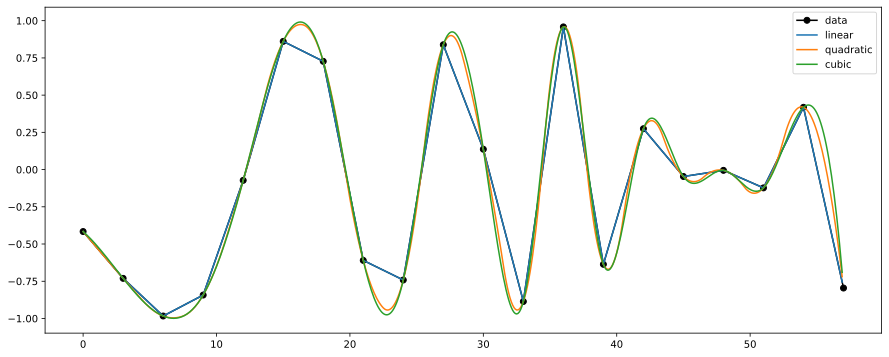

In [124]:
from scipy.interpolate import interp1d

# create data
x = np.arange(0, 60, 3)
y = np.cos ( x / 10 + 2 + (x / 10 )**2 ) 

# define plot
mplt.figure(figsize = (15,6))
mplt.plot(x,y,color = 'k', marker = 'o',label = 'data')

# create interpolation functions
interps= ['linear','quadratic','cubic']
funcs = {interp:interp1d(x, y, kind=interp,fill_value=np.nanmedian(y)) for interp in interps}

# define new x array
x_new = np.arange(0, 57, 0.1)

for interp in interps:
   mplt.plot(x_new,funcs[interp](x_new),label = interp)

mplt.legend()


### &rarr;  2-D interpolation (griddata)

`griddata(points, values, xi[, method, …])` - Interpolate unstructured 2-D data.

In [29]:
# Generate 2-D data grid
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

# model function
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

# data points
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])


In [30]:
from scipy.interpolate import griddata
# Fit data with different methods
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

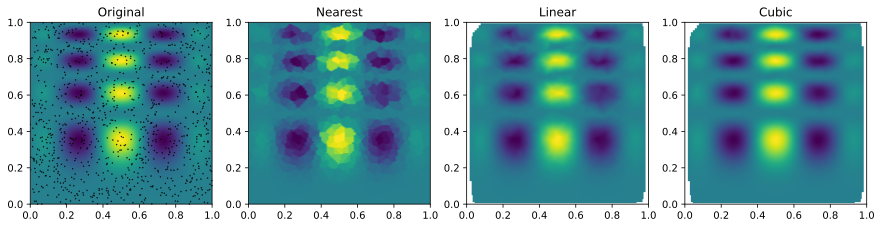

In [126]:
# Plots
import matplotlib.pyplot as plt
mplt.figure(figsize=(15,6))
mplt.subplot(141)
mplt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
mplt.plot(points[:,0], points[:,1], 'k.', ms=1)
mplt.title('Original')
mplt.subplot(142)
mplt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
mplt.title('Nearest')
mplt.subplot(143)
mplt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
mplt.title('Linear')
mplt.subplot(144)
mplt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
mplt.title('Cubic')

mplt.show()

### &rarr;  Spline interpolation
...


<img align="left" width="500" src="./know_more_banner.png">  <br /><br />

https://docs.scipy.org/doc/scipy-1.6.2/reference/tutorial/interpolate.html


## - Optimization tools (scipy.optimize)



In [130]:
# Generating some data to fit 

x = np.random.uniform(-5, 5., 100)
y_params = [2.,3.,-5.]
y = y_params[0] + y_params[1] * x + y_params[2] * x**2 + np.random.normal(0, 10., 100) 
e = np.random.normal(1., 5., 100) # error

# model that defines the data
def poly2(x, a, b,c):
    return a  + b * x + c * x**2 

### &rarr; Curve fitting 


`scipy.optimize.curve_fit(f, xdata, ydata[, p0, sigma, …])` - Use non-linear least squares to fit a function, f, to data.

In [131]:
from scipy.optimize import curve_fit


# fit results
popt, pcov = curve_fit(poly2, x, y, sigma=e)
print("a =", popt[0])
print("b =", popt[1])
print("c =", popt[2])


a = -1.657694864778204
b = 2.1294783893405724
c = -4.026111145025226


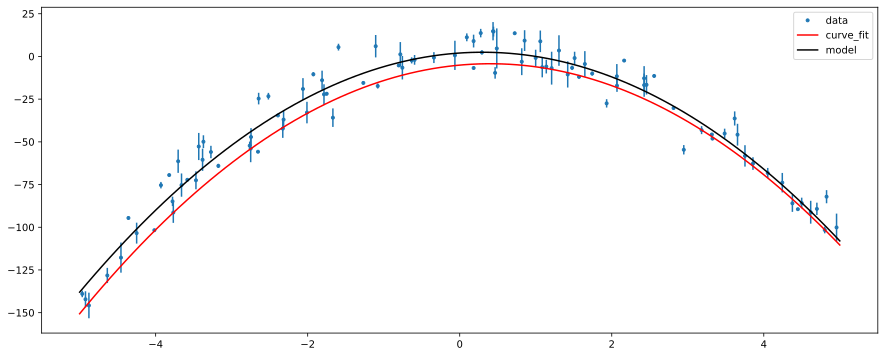

In [34]:
# plots
mplt.figure(figsize = (15,6))
mplt.plot(x, y, '.',label='data')
mplt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(-5, 5., 100)
mplt.plot(xfine, poly2(xfine, popt[0], popt[1], popt[2]), 'r-',label='curve_fit')
mplt.plot(xfine, poly2(xfine, y_params[0], y_params[1], y_params[2]), 'k-',label='model')
mplt.legend()

### &rarr; nonlinear least-squares fitting 

`scipy.optimize.least_squares(fun, x0[, jac, bounds, …])` - Solve a nonlinear least-squares problem with bounds on the variables.

In [135]:
from scipy.optimize import least_squares
# minimizing function
def fun(params):
    return poly2(x,params[0],params[1],params[2]) - y

# initial parameters
params_ini = [10,-2,3]

# fit results
params_fit = least_squares(fun, params_ini)
print("a =", params_fit['x'][0])
print("b =", params_fit['x'][1])
print("c =", params_fit['x'][2])



a = -0.22494143814307935
b = 2.8486766255807696
c = -4.815557137979419


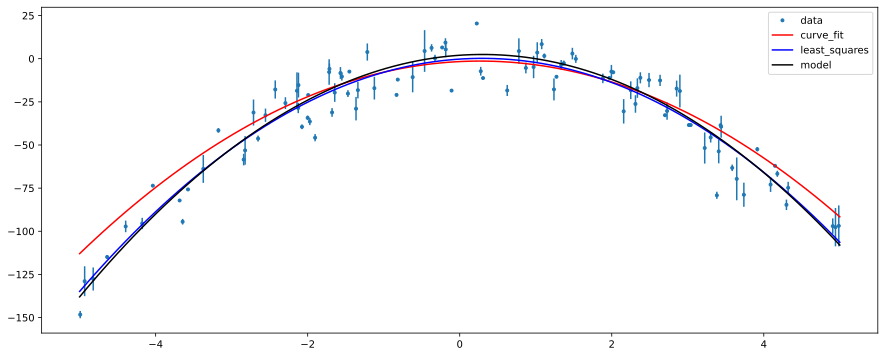

In [136]:
# plots
mplt.figure(figsize = (15,6))
mplt.plot(x, y, '.',label='data')
mplt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(-5, 5., 100)
mplt.plot(xfine, poly2(xfine, popt[0], popt[1], popt[2]), 'r-',label='curve_fit')
mplt.plot(xfine, poly2(xfine, params_fit['x'][0], params_fit['x'][1], params_fit['x'][2]), 'b-',label = 'least_squares')
mplt.plot(xfine, poly2(xfine, y_params[0], y_params[1], y_params[2]), 'k-',label='model')
mplt.legend()

### ...


<img align="left" width="500" src="./know_more_banner.png">  <br /><br />

https://docs.scipy.org/doc/scipy-1.6.2/reference/tutorial/optimize.html



## - and much more...

<img align="left" width="500" src="./know_more_banner.png">  <br /><br />


https://docs.scipy.org/doc/scipy-1.6.2/reference/

---
# Astropy

In [37]:
import astropy as astro
print(astro.__doc__)


Astropy is a package intended to contain core functionality and some
common tools needed for performing astronomy and astrophysics research with
Python. It also provides an index for other astronomy packages and tools for
managing them.


## - Exploring fits data files

### &rarr; Handling fits files

In [38]:
from astropy.io import fits
fits_image_filename = '../data/spectra.fits'
# open fits file as HDU list (Header Data Unit list)
hdul = fits.open(fits_image_filename)  

# print fits file information
hdul.info()

# close HDU list
hdul.close()

Filename: ../data/spectra.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (0,)      
  1  WAVE          1 ImageHDU         8   (4096, 72)   float64   
  2  TEMP          1 ImageHDU         8   (4096, 72)   float64   


In [39]:
# same as before, but within a context manager
with fits.open(fits_image_filename) as hdul:
    hdul.info()

Filename: ../data/spectra.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (0,)      
  1  WAVE          1 ImageHDU         8   (4096, 72)   float64   
  2  TEMP          1 ImageHDU         8   (4096, 72)   float64   


In [40]:
# write data to file
hdul = fits.open(fits_image_filename)  
hdul.writeto('../data/spectra_new.fits', overwrite=True)

# close HDU list
hdul.close()

### &rarr; Working with headers

In [41]:
# loading fits header
hdul = fits.open(fits_image_filename)
hdr0 = hdul[0].header
hdr1 = hdul['WAVE'].header
hdr2 = hdul[2].header


In [42]:
# viewing extension 0 header contents
hdr0

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                    0                                                  
EXTEND  =                    T                                                  

In [43]:
# viewing extension 1 header contents
hdr1

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                   72                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'WAVE    '           / extension name                                 

In [44]:
# view header key list
list(hdr2.keys())  

['XTENSION',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'NAXIS2',
 'PCOUNT',
 'GCOUNT',
 'EXTNAME']

In [45]:
# showing individual values
print(hdr1[4])
hdr0['EXTEND']


72


True

In [46]:
# adding/updating key/value in header
hdr2['banana'] = 'rama'
print('hdr2[{}] : {}'.format('banana',hdr2['banana']))

hdr2.set('poison', 'Alice Cooper')

print('hdr2[{}] : {}'.format('poison',hdr2['poison']))

hdr2[banana] : rama
hdr2[poison] : Alice Cooper


In [47]:
# adding key/value/comment in header
hdr2['doctor'] = ('who','T.A.R.D.I.S')
print('hdr2[{}] : {} / {}'.format('doctor',hdr2['doctor'],hdr2.comments['doctor']))

# updating key/value/comment in header
hdr2.set('doctor', 'who','Time And Relative Dimensions In Space')

print('hdr2[{}] : {} / {}'.format('doctor',hdr2['doctor'],hdr2.comments['doctor']))

hdr2[doctor] : who / T.A.R.D.I.S
hdr2[doctor] : who / Time And Relative Dimensions In Space


In [48]:
# Change values
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                   72                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'TEMP    '           / extension name                                 
BANANA  = 'rama    '                                                            
POISON  = 'Alice Cooper'                                                        
DOCTOR  = 'who     '           / Time And Relative Dimensions In Space          

### &rarr; Working with data

In [49]:
# loading fits data
data0 = hdul[0].data
data1 = hdul['WAVE'].data
data2 = hdul[2].data

In [50]:
# print data properties (numpy array properties)
print(data0.dtype.name)
data1.shape

float64


(72, 4096)

In [51]:
# print data
data2[:10,-5:-2]

array([[ 0.        ,  0.        ,  0.        ],
       [ 6.0504756 ,  4.54973412, -5.09431505],
       [14.49281502, 22.94881058,  2.9430759 ],
       [ 8.55088997, 10.27470875, 17.77082825],
       [24.26220703, 24.10009766, 38.36051178],
       [ 8.0759182 , 23.01345062, 13.49031162],
       [12.69156647, 50.55630493, 29.20264053],
       [30.02444267,  2.91292548, 52.68100357],
       [18.66321182, 12.92525005, 30.41882515],
       [34.14628601, 43.53718948, 57.77914429]])

In [52]:
# modify data values
data2[3:6,-3:-1] = np.nan
data2[1,-3] = -999
data2[:10,-4:]

array([[   0.        ,    0.        ,    0.        ,    0.        ],
       [   4.54973412, -999.        ,   47.63366318,   18.29163742],
       [  22.94881058,    2.9430759 ,    6.63907337,   28.18529701],
       [  10.27470875,           nan,           nan,   21.1298008 ],
       [  24.10009766,           nan,           nan,  -18.69415092],
       [  23.01345062,           nan,           nan,   16.28915405],
       [  50.55630493,   29.20264053,    7.26905489,   32.25184631],
       [   2.91292548,   52.68100357,   47.24837112,   41.05011749],
       [  12.92525005,   30.41882515,   10.67175961,   29.30817795],
       [  43.53718948,   57.77914429,   61.58086395,   51.68750381]])

<img align="left" width="500" src="./know_more_banner.png">  <br /><br />
https://docs.astropy.org/en/stable/io/fits/index.html

## - Units and Quantities (astropy.units)

## - Astronomical Coordinate Systems (astropy.coordinates)

## - Time and Dates (astropy.time)

## ...

<img align="left" width="500" src="./know_more_banner.png">  <br /><br />

https://docs.astropy.org/en/stable/

In [53]:
from astropy import units as u


---
# Astroquery

In [54]:
import astroquery as query
print(query.__doc__)


Accessing Online Astronomical Data.

Astroquery is an astropy affiliated package that contains a collection of tools
to access online Astronomical data. Each web service has its own sub-package.


## Some examples:
### &rarr; ESO Archive (http://archive.eso.org/cms.html)


In [55]:
from astroquery.eso import Eso 

# note that this requires a keyring backend to store the passwords
# see https://pypi.org/project/keyring/ for details
# setup login 
eso = Eso()
eso.login("jhumberto", store_password=True) 

INFO: Authenticating jhumberto on www.eso.org... [astroquery.eso.core]
INFO: Authentication successful! [astroquery.eso.core]


In [56]:
# get availble instruments list
eso.list_instruments()

['fors1',
 'fors2',
 'sphere',
 'vimos',
 'omegacam',
 'hawki',
 'isaac',
 'naco',
 'visir',
 'vircam',
 'apex',
 'giraffe',
 'uves',
 'xshooter',
 'espresso',
 'muse',
 'crires',
 'kmos',
 'sinfoni',
 'amber',
 'gravity',
 'matisse',
 'midi',
 'pionier',
 'wlgsu']

In [57]:
# Check accepted instrument query parameters
eso.query_instrument('espresso', help=True)

INFO: List of accepted column_filters parameters. [astroquery.eso.core]
INFO: The presence of a column in the result table can be controlled if prefixed with a [ ] checkbox. [astroquery.eso.core]
INFO: The default columns in the result table are shown as already ticked: [x]. [astroquery.eso.core]

Target Information
------------------
    target: 
    resolver: simbad (SIMBAD name), ned (NED name), none (OBJECT as specified by the observer)
    coord_sys: eq (Equatorial (FK5)), gal (Galactic)
    coord1: 
    coord2: 
    box: 
    format: sexagesimal (Sexagesimal), decimal (Decimal)
[x] wdb_input_file: 

Observation and proposal parameters
-----------------------------------
[ ] night: 
    stime: 
    starttime: 00 (00 hrs [UT]), 01 (01 hrs [UT]), 02 (02 hrs [UT]), 03 (03 hrs [UT]), 04 (04 hrs [UT]), 05 (05 hrs [UT]), 06 (06 hrs [UT]), 07 (07 hrs [UT]), 08 (08 hrs [UT]), 09 (09 hrs [UT]), 10 (10 hrs [UT]), 11 (11 hrs [UT]), 12 (12 hrs [UT]), 13 (13 hrs [UT]), 14 (14 hrs [UT]), 15 (15

In [58]:
# Query the archive for ESPRESSO science data on 2019-08-29
results = eso.query_instrument('espresso', column_filters={'night':'2019-08-29','dp_cat':'SCIENCE'}, columns=['target','prog_type'])
results.pprint(max_width=150)

Release Date  Object     RA        DEC         Target Ra Dec      ... DET READ CURNAME TELESCOPE  INS5 LSELA NAME INS5 LSELB NAME DIMM Seeing-avg
------------ ------- ---------- --------- ----------------------- ... ---------------- ---------- --------------- --------------- ---------------
  2020-08-30   K2-23 331.202603 -12.01786 22:04:48.62 -12:01:04.3 ...             Slow ESO-VLT-U3            DARK            DARK     1.58 [1.00]
  2020-08-30   K2-23  331.20261 -12.01784 22:04:48.63 -12:01:04.2 ...             Slow ESO-VLT-U3            DARK            DARK     1.44 [0.85]
  2020-08-30   K2-23 331.202637 -12.01782 22:04:48.63 -12:01:04.2 ...             Slow ESO-VLT-U3            DARK            DARK     2.24 [1.72]
  2020-08-30 LHS1140  11.248446 -15.27439 00:44:59.63 -15:16:27.8 ...             Slow ESO-VLT-U3            DARK            FPCS     1.20 [0.53]


In [59]:
# Query the archive for ESPRESSO science data on 2019-08-29, and return only the target name, ra, dec and release date
results = eso.query_instrument('espresso', column_filters={'night':'2019-08-29','dp_cat':'SCIENCE'}, columns=['target','prog_type'])['Object','RA','DEC','Release Date']
results.pprint(max_width=100)


 Object     RA        DEC    Release Date
------- ---------- --------- ------------
  K2-23 331.202603 -12.01786   2020-08-30
  K2-23  331.20261 -12.01784   2020-08-30
  K2-23 331.202637 -12.01782   2020-08-30
LHS1140  11.248446 -15.27439   2020-08-30


### &rarr; SIMBAD  (http://simbad.u-strasbg.fr/simbad/)

In [60]:
from astroquery.simbad import Simbad

# query for HD 209458
results_table = Simbad.query_object("HD 209458")
print(results_table)

 MAIN_ID        RA           DEC      ... COO_WAVELENGTH     COO_BIBCODE    
             "h:m:s"       "d:m:s"    ...                                   
--------- ------------- ------------- ... -------------- -------------------
HD 209458 22 03 10.7729 +18 53 03.548 ...              O 2018yCat.1345....0G


In [61]:
# returning the ra, dec, main ID of Helvetios
results_table = Simbad.query_object("Helvetios")
print(results_table['MAIN_ID','RA','DEC'])

 MAIN_ID        RA           DEC     
             "h:m:s"       "d:m:s"   
--------- ------------- -------------
*  51 Peg 22 57 27.9804 +20 46 07.782


In [62]:
# query for all WASP targets
results_table = Simbad.query_object("WASP-*", wildcard=True)
print (results_table['MAIN_ID','RA','DEC'])

  MAIN_ID          RA           DEC     
                "h:m:s"       "d:m:s"   
------------ ------------- -------------
      WASP-1 00 20 40.0746 +31 59 23.953
     WASP-1b 00 20 40.0746 +31 59 23.953
      WASP-2 20 30 54.1279 +06 25 46.338
** DAE   10B  20 30 54.179  +06 25 46.18
     WASP-2b 20 30 54.1279 +06 25 46.338
 BD+35  3293 18 34 31.6255 +35 39 41.489
BD+35  3293b 18 34 31.6255 +35 39 41.489
      WASP-4 23 34 15.0858 -42 03 41.049
     WASP-4b 23 34 15.0858 -42 03 41.049
      WASP-5 23 57 23.7565 -41 16 37.745
         ...           ...           ...
   WASP-181b 01 47 10.3796 +03 07 58.897
   WASP-182b 20 46 41.5598 -41 49 15.202
   WASP-183b 10 55 09.3535 -00 44 13.811
   WASP-184b 13 58 04.0876 -30 20 53.271
   WASP-185b 14 16 14.3136 -19 32 32.208
 TOI-1494.01 01 15 58.8508 +21 37 01.006
 TOI-1493.01 01 09 53.9653 +25 40 54.103
   WASP-189b 15 02 44.8679 -03 01 52.986
   WASP-190b 00 30 50.2350 -40 34 24.319
   WASP-192b 14 54 38.0915 -38 44 40.344
Length = 394 row

In [63]:
# list all possible wildcards
Simbad.list_wildcards()

* : Any string of characters (including an empty one)

? : Any character (exactly one character)

[abc] : Exactly one character taken in the list. Can also be defined by a range of characters: [A-Z]

[^0-9] : Any (one) character not in the list.


In [64]:
# query a article/bibcode
results_table = Simbad.query_bibcode('1995Natur.378..355M')

print (results_table)

                                                                 References                                                                 
--------------------------------------------------------------------------------------------------------------------------------------------
1995Natur.378..355M = DOI 10.1038/378355a0
Nature, 378, 355-359 (1995)
MAYOR M. and QUELOZ D.
A Jupiter-mass companion to a solar-type star.


In [65]:
# query for all objects related to an article/bibcode
results_table = Simbad.query_bibobj('1995Natur.378..355M')
print(results_table['MAIN_ID','RA','DEC'])

  MAIN_ID          RA           DEC     
                "h:m:s"       "d:m:s"   
------------ ------------- -------------
PSR B1257+12 13 00 03.1075 +12 40 55.155
 *  51 Peg b 22 57 27.9804 +20 46 07.782
   *  51 Peg 22 57 27.9804 +20 46 07.782


## What services are available in Astroquery?

<img align="left" width="500" src="./know_more_banner.png">  <br />  <br />  

https://astroquery.readthedocs.io/en/latest/#available-services

---
# Pandas

In [66]:
import pandas as pd
print(pd.__doc__)


pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be inserted and deleted from DataFrame and
    higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned
    to a set of labels, or the user can simply ignore the labels and

img align="left" width="500" src="./know_more_banner.png">  <br />  <br />  

https://pandas.pydata.org/docs/

---
# Astroconda

AstroConda is a free Conda channel maintained by the Space Telescope Science Institute (STScI) in Baltimore, Maryland. This channel provides tools and utilities required to process and analyze data from the Hubble Space Telescope (HST), James Webb Space Telescope (JWST), and others.

At this moment, it is the best (only?) way to install IRAF on more recent machines.



<img align="left" width="500" src="./know_more_banner.png">  <br />  <br />  

https://astroconda.readthedocs.io/en/latest/


---
# python-cpl

"The Common Pipeline Library (CPL) consists of a set of C libraries, which have been developed to standardise the way VLT instrument pipelines are built, to shorten their development cycle and to ease their maintenance. The Common Pipeline Library was not designed as a general purpose image processing library, but rather to address two primary requirements. The first of these was to provide an interface to the VLT pipeline runtime- environment. The second was to provide a software kit of medium-level tools, which allows astronomical data-reduction tasks to be built rapidly." (http://www.eso.org/sci/software/cpl/introduction.html) 

The `python-cpl` library is a non-official python module to access and run CPL recipes. 

<img align="left" width="500" src="./know_more_banner.png">  <br />  <br />  

https://python-cpl.readthedocs.io/en/latest/


--- 


<img align="left" width="500" src="./know_more_banner.png">  <br />  <br />  

email us at <Jorge.Martins@astro.up.pt> or <Andre.Silva@astro.up.pt>